In [1]:
!python main.py --device cuda --dataset lorenz --dsid 1 --model eSRU_1LF --n 10 --T 1000 --F 10 --nepochs 2000 --mu1 0.001 --mu2 0.03162 --mu3 0.232079 --lr 0.01 --joblog crossval/logs/test.npz

Computational Resource: cuda
node = 0
741
Predicted Node = 0 	 epoch = 4 	 lr = 0.0099 	 Training loss = 23.2120 	 Fit error = 23.0186 	 Delta = 0.032635
Elapsed time (1) = 0.18192076683044434 seconds
Predicted Node = 0 	 epoch = 8 	 lr = 0.0098 	 Training loss = 19.8859 	 Fit error = 19.6862 	 Delta = 0.026452
Elapsed time (1) = 0.1829380989074707 seconds
Predicted Node = 0 	 epoch = 12 	 lr = 0.0097 	 Training loss = 8.2699 	 Fit error = 8.0633 	 Delta = 0.015934
Elapsed time (1) = 0.18695878982543945 seconds
Predicted Node = 0 	 epoch = 16 	 lr = 0.0096 	 Training loss = 5.0904 	 Fit error = 4.8807 	 Delta = 0.014037
Elapsed time (1) = 0.17598843574523926 seconds
Predicted Node = 0 	 epoch = 20 	 lr = 0.0095 	 Training loss = 2.6793 	 Fit error = 2.4694 	 Delta = 0.009642
Elapsed time (1) = 0.19916677474975586 seconds
Predicted Node = 0 	 epoch = 24 	 lr = 0.0094 	 Training loss = 1.8888 	 Fit error = 1.6770 	 Delta = 0.005406
Elapsed time (1) = 0.1790623664855957 seconds
Predicted 

In [5]:
import numpy as np

a = np.load('./crossval/logs/test.npz')
sru_gc = a['Gest']
gc = a['Gref']

In [6]:
sru_gc_th = np.zeros([10,10])
th = 0.5
for i in range(10):
    for j in range(10):
        if sru_gc[i][j] >= th :
            sru_gc_th[i][j] = 1
        else:
            sru_gc_th[i][j] = 0
            

True variable usage = 40.00%
Estimated variable usage = 40.00%
Accuracy = 100.00%


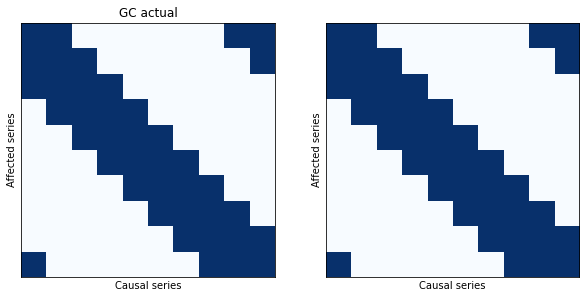

In [7]:
import matplotlib.pyplot as plt
print('True variable usage = %.2f%%' % (100 * np.mean(gc)))
print('Estimated variable usage = %.2f%%' % (100 * np.mean(sru_gc_th)))
print('Accuracy = %.2f%%' % (100 * np.mean(gc == sru_gc_th)))

# Make figures
fig, axarr = plt.subplots(1, 2, figsize=(10, 5))
axarr[0].imshow(gc, cmap='Blues')
axarr[0].set_title('GC actual')
axarr[0].set_ylabel('Affected series')
axarr[0].set_xlabel('Causal series')
axarr[0].set_xticks([])
axarr[0].set_yticks([])

axarr[1].imshow(sru_gc_th, cmap='Blues', vmin=0, vmax=1, extent=(0, len(sru_gc_th), len(sru_gc_th), 0))
axarr[1].set_ylabel('Affected series')
axarr[1].set_xlabel('Causal series')
axarr[1].set_xticks([])
axarr[1].set_yticks([])

# Mark disagreements
for i in range(len(sru_gc_th)):
    for j in range(len(sru_gc_th)):
        if gc[i, j] != sru_gc_th[i, j]:
            rect = plt.Rectangle((j, i-0.05), 1, 1, facecolor='none', edgecolor='red', linewidth=1)
            axarr[1].add_patch(rect)

plt.show()

In [8]:
sru_gc

array([[2.0832672 , 0.7219063 , 0.14456479, 0.16971003, 0.15459141,
        0.12035434, 0.0243533 , 0.11289792, 0.83667034, 1.000796  ],
       [1.2063676 , 1.6846019 , 0.8971263 , 0.13718973, 0.12792122,
        0.08849223, 0.02028476, 0.01520074, 0.11765054, 0.96085614],
       [0.9505509 , 0.8520347 , 1.7732222 , 0.9014605 , 0.23223832,
        0.07240251, 0.06553884, 0.04932839, 0.12401922, 0.17520033],
       [0.03707426, 0.8537336 , 0.9625734 , 2.009604  , 0.6981505 ,
        0.19842899, 0.09063729, 0.09207649, 0.18620732, 0.03649412],
       [0.09234727, 0.06972151, 0.5778543 , 1.6496241 , 1.8289305 ,
        0.66332835, 0.1057407 , 0.        , 0.04490392, 0.        ],
       [0.07391977, 0.04113414, 0.05917168, 0.80199164, 0.76461345,
        1.6282101 , 0.7215075 , 0.12729824, 0.05724866, 0.03730518],
       [0.08892792, 0.14997122, 0.06450928, 0.09200484, 0.93306506,
        1.1223118 , 2.0656557 , 0.8122686 , 0.1923449 , 0.08134835],
       [0.09412154, 0.10467461, 0.1026664